In [2]:
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LassoCV,
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [3]:
%pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [5]:
import streamlit as st

In [7]:
def fetch_student_data():
    """Fetches and combines the student performance datasets."""
    try:
        math_df = pd.read_csv('dirty/student-mat.csv', sep=';', index_col=0)
        port_df = pd.read_csv('dirty/student-por.csv', sep=';', index_col=0)
        for df in [math_df, port_df]:
            string_columns = df.select_dtypes(include=['object']).columns
            for col in string_columns:
                df[col] = df[col].str.replace('"', '').str.strip()
        math_df['subject'] = 'math'
        port_df['subject'] = 'portuguese'
        combined_df = pd.concat([math_df, port_df], axis=0)
        combined_df = combined_df.reset_index(drop=True)
        return combined_df
    except Exception as e:
        st.error(f"Error loading data: {str(e)}")
        return None

def clean_data(df):
    """Cleans the student data."""
    if df is None:
        return None

    try:
        cleaned_df = df.copy()
        grade_columns = ['G1', 'G2', 'G3']
        for col in grade_columns:
            cleaned_df[col] = pd.to_numeric(cleaned_df[col], errors='coerce')
        numeric_columns = cleaned_df.select_dtypes(include=['float64', 'int64']).columns
        for col in numeric_columns:
            cleaned_df[col] = cleaned_df[col].fillna(cleaned_df[col].mean())
        categorical_columns = cleaned_df.select_dtypes(include=['object']).columns
        for col in categorical_columns:
            cleaned_df[col] = cleaned_df[col].fillna(cleaned_df[col].mode()[0])
        return cleaned_df
    except Exception as e:
        st.error(f"Error cleaning data: {str(e)}")
        return None


In [8]:
def prepare_data(data):
    target = 'G3'

    #separate features and target var
    
    #dropped = data[target].values()
    X = data.drop(columns=[target])
    y = data[target]
    
    X = pd.get_dummies(X, drop_first=True)

    #print(X.shape)
    #print(y.shape)
    
    return X, y

In [9]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler

In [10]:
def feature_selection(X, y):
    selector = SelectKBest(f_regression, k=10)
    X_selected = selector.fit_transform(X, y)
    return X_selected

In [11]:
def normalization(X):
    scaler = StandardScaler()
    X_normalized = scaler.fit_transform(X)
    return X_normalized

In [12]:
data = fetch_student_data()
cleaned_data = clean_data(data)

X, y = prepare_data(cleaned_data)

#print(cleaned_data['G3'].shape)

X_selected = feature_selection(X, y)
X_normalized = normalization(X_selected)

#print(X_normalized.shape)

processed_data = pd.concat([pd.DataFrame(X_normalized), cleaned_data[['G3']]], axis=1)

Mean Squared Error: 2.8930395459460603
Mean Absolute Error: 0.8969143735735566
R-squared Score: 0.8128792727758448


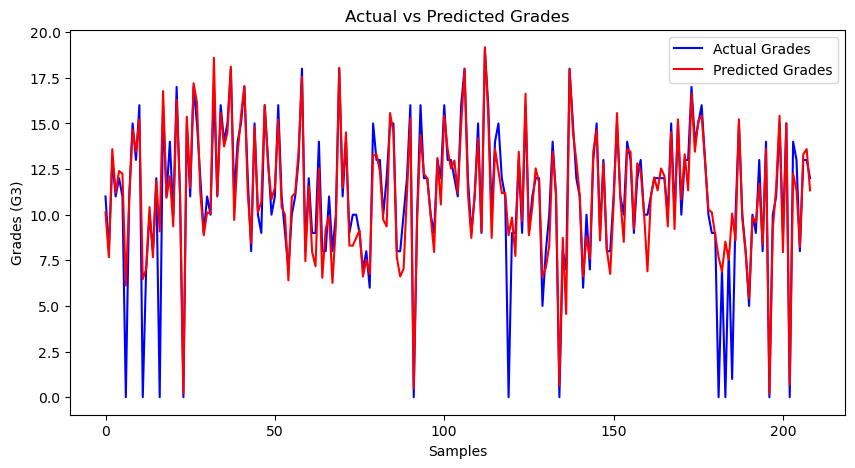

In [52]:
if processed_data is not None:
    features = processed_data.drop(['G3'], axis=1)
    labels = processed_data['G3']
    
    features = pd.get_dummies(features)
    
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    
    X_train, X_test, y_train, y_test = train_test_split(
        features_scaled, labels, test_size=0.2, random_state=42
    )
    
    model = LassoCV(cv=5, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared Score: {r2}")
    
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values, label="Actual Grades", color="blue")
    plt.plot(y_pred, label="Predicted Grades", color="red")
    plt.xlabel("Samples")
    plt.ylabel("Grades (G3)")
    plt.title("Actual vs Predicted Grades")
    plt.legend()
    plt.show()
        
    #return model, scaler, feature_importance